**ANN Classification Model - Cotton Pulps Grades**  

In [1]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improt Required Package for Standardization
from sklearn.preprocessing import StandardScaler

# Improt Required Package for Partitioning
from sklearn.model_selection import train_test_split

# Improt Required Package for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Improt Required Package Model Accuracy Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Loading Dataset to a pandas Dataframe
CottonPulps_data = pd.read_csv('Cotton Pulps_Factors.csv')

In [4]:
# Getting Dataset Shape
CottonPulps_data.shape

(500, 21)

In [5]:
# Count Number of Records for each Grade
CottonPulps_data['Final Grade Letter'].value_counts()

,count
Final Grade Letter,
B,267
A,183
C,50


<Axes: xlabel='Final Grade Letter', ylabel='count'>

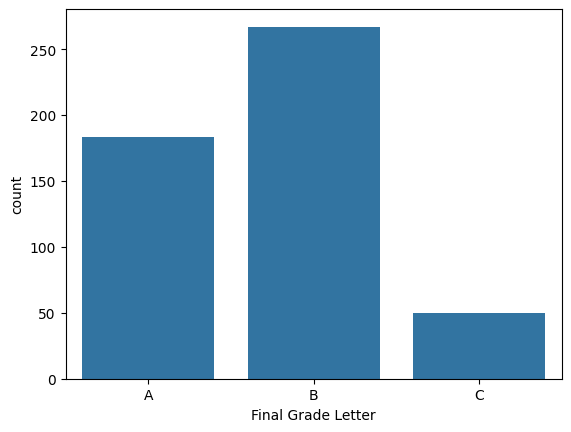

In [6]:
# Visulaizing number of Records for each Class
sns.countplot(x="Final Grade Letter" , data = CottonPulps_data)

In [7]:
# Drop Unnecessary Columns
CottonPulps_data = CottonPulps_data.iloc[:, 3:].dropna(axis=0)

**Converting Final Grade Letter to Numerical Value**

A --> 0

B --> 1

C --> 2

In [8]:
# Converting Final Grade Letter to Numerical Value using "LabelEncoder"
from sklearn.preprocessing import LabelEncoder

# Example data
Y_labels = CottonPulps_data['Final Grade Letter']

# Create encoder
encoder = LabelEncoder()
Y_encoded_labels = encoder.fit_transform(Y_labels)

print(Y_encoded_labels)

[0 1 1 0 2 0 2 1 1 1 1 1 0 1 0 0 1 1 2 1 0 1 0 0 1 0 0 1 2 1 2 1 1 2 0 0 2
 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 0 0 2 0 1 1 0 1 1 0 2 2 1 1 0 1 1 2 0 1 1 1 1 0 1 0 0 2 2 1
 1 1 0 1 1 0 1 1 1 1 1 2 1 0 0 1 2 1 1 0 0 1 2 1 1 1 2 1 1 0 1 0 2 0 0 0 1
 0 1 2 2 0 1 0 1 1 0 1 1 0 1 0 2 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 2 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 2 0 1 0 1 1 2 1 1 1 1 2 0
 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 2 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 2 1 0 1 0 1 1 0 2
 0 1 1 0 1 1 1 0 2 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0
 0 1 0 1 1 2 1 0 0 1 1 0 2 1 1 0 1 0 0 0 0 1 0 0 1 2 2 2 2 1 2 1 0 0 0 2 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 2 1 0 0 1 0 2 1 0 1 1 0 0 2 0 1 1 1 1 1
 0 2 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 2 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 0 1 1 2 1 0 2 2 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 2 1 0 0 1 0 1 0 2 0 2 

In [9]:
# Create a new column to CottonPulps_data Dataframe called Final Grade Labels
CottonPulps_data ['Final Grade Labels'] = Y_encoded_labels

In [10]:
# Define Predictors (Features)
CottonPulps_data_X = CottonPulps_data.drop(columns=['Final Grade','Final Grade Letter', 'Final Grade Labels'], axis=1)

**Converting Categorical Variables to Numerical Variables**

1) Ginning Methods:
   For all Records are Automated ---> So, no Dummy Variable is defined for it
   
   
2) Packing Method:

   Bails --> 0
   Rolls --> 1

In [11]:
# Define Dummy Variables for Categorical Variables
CottonPulps_data_X = pd.get_dummies(CottonPulps_data_X,prefix_sep='_', drop_first=True)
CottonPulps_data_X = CottonPulps_data_X.astype(int)

In [12]:
# Separating Features and Target
X = CottonPulps_data_X
Y = CottonPulps_data['Final Grade Labels']

**Data Standardization**

In [13]:
# Create an Instance of Scaler
scaler = StandardScaler()

In [14]:
# Fit Scaler to Features
scaler.fit(X)

StandardScaler()

In [15]:
# Transform Features
standardized_data = scaler.transform(X)

In [16]:
# Create a Dataframe of Standardized Features
standardized_df = pd.DataFrame(standardized_data)

In [17]:
# Define Features X & Targert Y
X = standardized_df
Y = CottonPulps_data['Final Grade Labels']

In [18]:
# Adding "Final Grade Labels" column
standardized_df ['Final Grade Labels'] = CottonPulps_data['Final Grade Labels']

In [19]:
# Partition Dataset to Training, Validation, & Test Sets: Training (70%) & Validation (30%)
trainData, validData = train_test_split(standardized_df, test_size=0.30, random_state=42)
print('Training: ', trainData.shape)
print('Validation: ', validData.shape)

Training:  (350, 16)
Validation:  (150, 16)


In [20]:
# Showing Records of Features in Training Set
X_train = trainData.drop(columns=['Final Grade Labels'], axis=1)

In [21]:
# Showing Records of Target in Training Set
Y_train = trainData['Final Grade Labels']

In [22]:
# Showing Records of Features in Validation Set
X_valid = validData.drop(columns=['Final Grade Labels'], axis=1)

In [23]:
# Showing Records of Target in Validation Set
Y_valid = validData['Final Grade Labels']

**Building ANN Classification Model**

In [24]:
# Get the shape of features to define number of Neurons
X_train.shape

(350, 15)

In [25]:
# Build an ANN Classification Model
model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))

# Multi-class Classification
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Train Medel on Training Set
model.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_valid, Y_valid))

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.2477 - val_loss: 1.2432
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1029 - val_loss: 1.0231
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9518 - val_loss: 0.8623
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8608 - val_loss: 0.7498
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7577 - val_loss: 0.6731
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7246 - val_loss: 0.6076
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6680 - val_loss: 0.5549
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5807 - val_loss: 0.5127
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5952 - val_loss: 0.4730
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5063 - val_loss: 0.4420
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4355 - val_loss: 0.4099
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

In [27]:
# Get the History of Model Training
losses = pd.DataFrame(model.history.history)

In [28]:
# Get the Losses values
losses

,loss,val_loss
0,1.258329,1.243181
1,1.055136,1.023051
2,0.911578,0.862273
3,0.806357,0.749783
4,0.725551,0.673141
...,...,...
295,0.034716,0.178984
296,0.034175,0.179127
297,0.034558,0.179761
298,0.034971,0.179113


<Axes: >

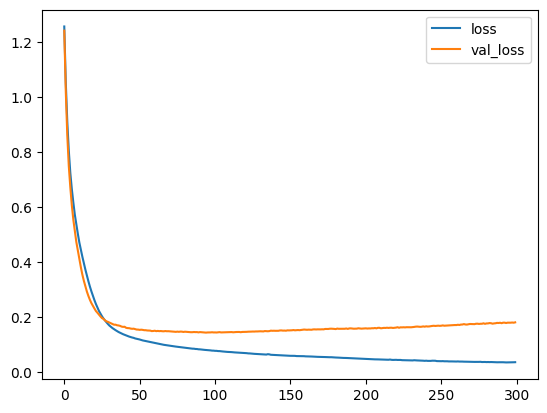

In [29]:
# Plot the Losses
losses.plot( )

**Creating Early Stop**

In [30]:
# Build an ANN Classification Model with Early Stop
model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))

# Multi-class Classification
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Import Requried Package
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Define the Early Stop Incident
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
# Train Medel on Training Set
model.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_valid, Y_valid),
          callbacks=[early_stop])

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.6315 - val_loss: 1.1960
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2664 - val_loss: 0.9374
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8832 - val_loss: 0.7801
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7703 - val_loss: 0.6741
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6551 - val_loss: 0.5935
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5071 - val_loss: 0.5343
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5005 - val_loss: 0.4816
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4559 - val_loss: 0.4407
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3985 - val_loss: 0.4060
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4246 - val_loss: 0.3775
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3665 - val_loss: 0.3545
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - l

In [34]:
# Get the History of Model Training with Early Stop
model_loss = pd.DataFrame(model.history.history)

In [35]:
# Get the Losses values
model_loss

,loss,val_loss
0,1.479891,1.195971
1,1.127829,0.937384
2,0.879128,0.780071
3,0.730652,0.674121
4,0.630723,0.593502
...,...,...
143,0.054299,0.160948
144,0.054025,0.160446
145,0.053746,0.162161
146,0.053638,0.162121


<Axes: >

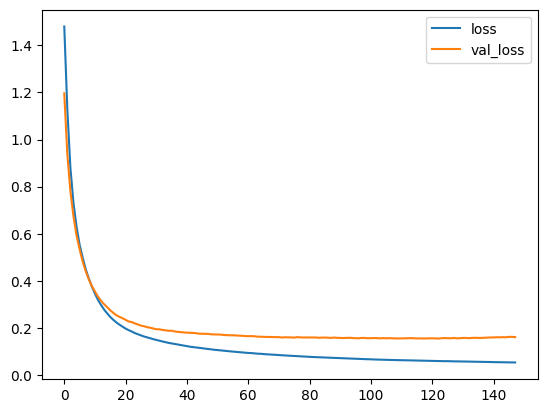

In [36]:
# Plot the Losses
model_loss.plot( )

**Adding Dropout Layers to Prevent Overfitting**

Dropout Layers turns off percentag of Neurons randomly.

**Adding Dropout Layers**

In [37]:
# Import Required Package
from tensorflow.keras.layers import Dropout

In [38]:
# Build an ANN Classification Model with Dropout Layers
model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))   #Dropout(0): means zero Neuron will be trun off --> # Dropout(1): means all Neuron will be trun off

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

# Multi-class Classification
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Define the Early Stop Incident
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [40]:
# Train Medel on Training Set
model.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_valid, Y_valid),
          callbacks=[early_stop])

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0762 - val_loss: 0.7431
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7856 - val_loss: 0.7018
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3065 - val_loss: 0.6797
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1333 - val_loss: 0.6652
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1405 - val_loss: 0.6554
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9671 - val_loss: 0.6491
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1867 - val_loss: 0.6434
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1131 - val_loss: 0.6360
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9827 - val_loss: 0.6340
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7946 - val_loss: 0.6226
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8302 - val_loss: 0.6136
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [41]:
# Get the History of Model Training
model_loss_dropout = pd.DataFrame(model.history.history)

In [42]:
# Get the Losses values
model_loss_dropout

,loss,val_loss
0,2.065835,0.743073
1,1.660206,0.701839
2,1.320242,0.679743
3,1.290391,0.665220
4,1.141606,0.655392
...,...,...
295,0.213566,0.163587
296,0.213155,0.158484
297,0.231190,0.165064
298,0.223345,0.164920


<Axes: >

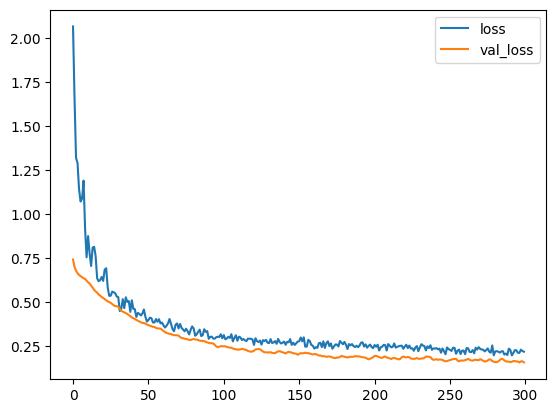

In [43]:
# Plot the Losses
model_loss_dropout.plot( )

**Checking ANN Classification Model Accuracy**

In [44]:
# Accuracy on Training Data
X_train_prediction = (model.predict(X_train) > 0.5).astype("int32")
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [45]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.8571428571428571


In [46]:
# Accuracy on Validation Data
X_valid_prediction = (model.predict(X_valid) > 0.5).astype("int32")
valid_data_accuracy = accuracy_score(X_valid_prediction, Y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [47]:
print('Accuracy on Validation Data : ', valid_data_accuracy)

Accuracy on Validation Data :  0.82


In [48]:
# Get Prediction for Test Data
Y_pred = (model.predict(X_valid) > 0.5).astype("int32")
#Y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


**Confusion Matrix - Imbalanced Data**

In [49]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.79      0.92      0.85        83
           2       0.00      0.00      0.00        15

    accuracy                           0.82       150
   macro avg       0.55      0.61      0.58       150
weighted avg       0.74      0.82      0.78       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Classification: Predicting Class**

In [50]:
# Create a Confusion Matrix
print(confusion_matrix(Y_valid, Y_pred))

[[47  5  0]
 [ 7 76  0]
 [ 0 15  0]]


Text(0.5, 1.0, 'Confusion Matix - No Balancing')

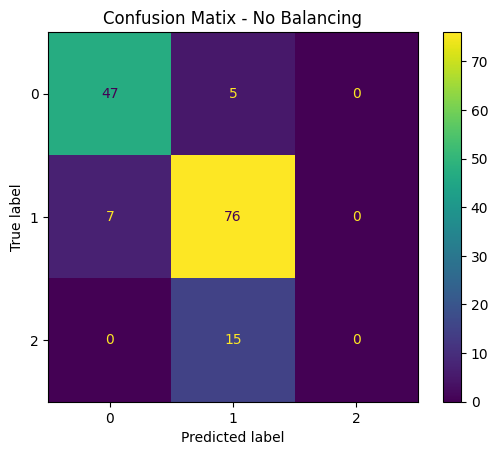

In [51]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_valid, Y_pred)
plt.title("Confusion Matix - No Balancing")

**Fixing Imbalanced Issue**

**Fixing Imbalanced Issue -  SMOTE Method**

SMOTE stands for Synthetic Monority oversampling Technique  

In [52]:
# Import Required Package
from imblearn.over_sampling import SMOTE

In [53]:
# Initialize SMOTE
smote = SMOTE()

In [54]:
# Resample data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [55]:
# Checking the new Class Balance
pd.Series(y_resampled).value_counts()

,count
Final Grade Labels,
0,184
1,184
2,184


In [56]:
# Build an ANN Classification with SMOTE
model_smote = Sequential()

model_smote.add(Dense(15, activation='relu'))
model_smote.add(Dense(8, activation='relu'))

# Multi-class Classification
model_smote.add(Dense(1, activation='linear'))

model_smote.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Train ANN Classification with SMOTE on Training Set
model_smote.fit(x=X_resampled, y=y_resampled, epochs=300, validation_data=(X_valid, Y_valid))

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5747 - val_loss: 0.4044
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4220 - val_loss: 0.3719
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3771 - val_loss: 0.3248
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2780 - val_loss: 0.2812
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2263 - val_loss: 0.2516
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2097 - val_loss: 0.2355
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2229 - val_loss: 0.2177
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1639 - val_loss: 0.2059
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1602 - val_loss: 0.1967
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1428 - val_loss: 0.1874
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1435 - val_loss: 0.1802
Epoch 12/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [58]:
# Get the History of Model Training
losses_smote = pd.DataFrame(model_smote.history.history)

In [59]:
# Get the Losses values
losses_smote

,loss,val_loss
0,0.571064,0.404404
1,0.424255,0.371861
2,0.343008,0.324751
3,0.282888,0.281170
4,0.243928,0.251635
...,...,...
295,0.010995,0.138358
296,0.011076,0.140019
297,0.010617,0.140445
298,0.010683,0.141458


<Axes: >

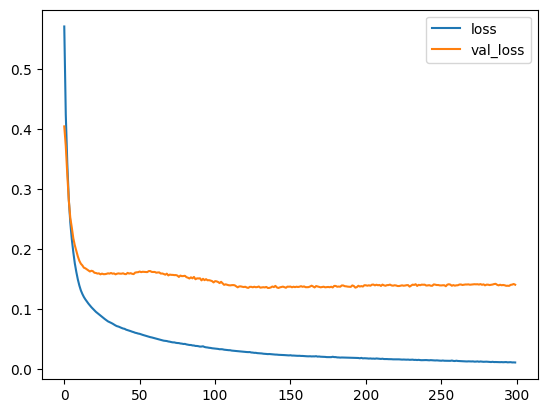

In [60]:
# Plot the Losses
losses_smote.plot( )

**Creating Early Stop for SMOTE**

In [61]:
# Build an ANN Classification with SMOTE
model_smote = Sequential()

model_smote.add(Dense(15, activation='relu'))
model_smote.add(Dense(8, activation='relu'))

# Multi-class Classification
model_smote.add(Dense(1, activation='linear'))

model_smote.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Import Requried Package
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
# Define the Early Stop Incident
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [64]:
# Train Medel on Training Set
model_smote.fit(x=X_resampled, y=y_resampled, epochs=300, validation_data=(X_valid, Y_valid),
          callbacks=[early_stop])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3854 - val_loss: 0.9033
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4434 - val_loss: 0.6460
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9973 - val_loss: 0.5374
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7157 - val_loss: 0.4872
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6208 - val_loss: 0.4493
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4765 - val_loss: 0.4154
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3949 - val_loss: 0.3829
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3539 - val_loss: 0.3551
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3252 - val_loss: 0.3280
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2866 - val_loss: 0.3066
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2612 - val_loss: 0.2896
Epoch 12/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

In [65]:
# Get the History of Model Training
losses_smote_est = pd.DataFrame(model_smote.history.history)

In [66]:
# Get the Losses values
losses_smote_est

,loss,val_loss
0,2.116826,0.903261
1,1.356581,0.645987
2,0.929853,0.537395
3,0.692627,0.487158
4,0.554230,0.449323
...,...,...
104,0.049654,0.126759
105,0.049708,0.127896
106,0.049387,0.126396
107,0.049306,0.127755


<Axes: >

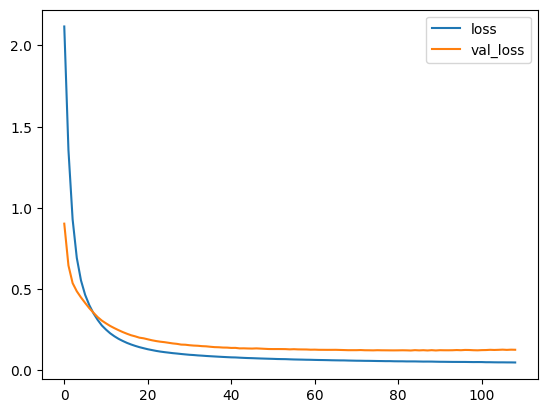

In [67]:
# Plot the Losses
losses_smote_est.plot( )

In [68]:
# Accuracy on Training SMOTE Data
X_train_smote_prediction = (model_smote.predict(X_train) > 0.5).astype("int32")
training_smote_data_accuracy = accuracy_score(X_train_smote_prediction, Y_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [69]:
print('Accuracy on Training SMOTE Data-Early Stop : ', training_smote_data_accuracy)

Accuracy on Training SMOTE Data-Early Stop :  0.8685714285714285


In [70]:
# Accuracy on Validation SMOTE Data
X_valid_smote_prediction = (model_smote.predict(X_valid) > 0.5).astype("int32")
valid_smote_data_accuracy = accuracy_score(X_valid_smote_prediction, Y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [71]:
print('Accuracy on Validation SMOTE Data-Early Stop : ', valid_smote_data_accuracy)

Accuracy on Validation SMOTE Data-Early Stop :  0.7933333333333333


In [72]:
# Get Prediction for Validation Data
Y_pred_smote = (model_smote.predict(X_valid) > 0.5).astype("int32")
#Y_pred_smote

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [73]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , Y_pred_smote))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.78      0.87      0.82        83
           2       0.00      0.00      0.00        15

    accuracy                           0.79       150
   macro avg       0.53      0.59      0.56       150
weighted avg       0.71      0.79      0.75       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Adding Dropout Layers - SMOTE**

In [74]:
# Import Required Package
from tensorflow.keras.layers import Dropout

In [75]:
# Build an ANN Classification Model with Dropout Layers
model_smote_drop = Sequential()

model_smote_drop.add(Dense(15, activation='relu'))
model_smote_drop.add(Dropout(0.5))   #Dropout(0): means zero Neuron will be trun off --> # Dropout(1): means all Neuron will be trun off

model_smote_drop.add(Dense(8, activation='relu'))
model_smote_drop.add(Dropout(0.5))

# Multi-class Classification
model_smote_drop.add(Dense(1, activation='linear'))

model_smote_drop.compile(loss='mse', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Import Requried Package
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
# Define the Early Stop Incident
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [78]:
# Train Medel on Training Set
model_smote_drop.fit(x=X_resampled, y=y_resampled, epochs=300, validation_data=(X_valid, Y_valid),
          callbacks=[early_stop])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8536 - val_loss: 1.1687
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8009 - val_loss: 0.9638
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9932 - val_loss: 0.8276
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8094 - val_loss: 0.7415
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7626 - val_loss: 0.6665
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4222 - val_loss: 0.6084
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5760 - val_loss: 0.5602
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3270 - val_loss: 0.5193
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2541 - val_loss: 0.4994
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0381 - val_loss: 0.4706
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0643 - val_loss: 0.4416
Epoch 12/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.

In [79]:
# Get the History of Model Training
losses_smote_drop = pd.DataFrame(model_smote_drop.history.history)

In [80]:
# Get the Losses values
losses_smote_drop

,loss,val_loss
0,2.902229,1.168736
1,2.619411,0.963839
2,1.990682,0.827580
3,1.710920,0.741488
4,1.644802,0.666515
...,...,...
295,0.250153,0.121261
296,0.261957,0.118757
297,0.239528,0.118645
298,0.249093,0.119935


<Axes: >

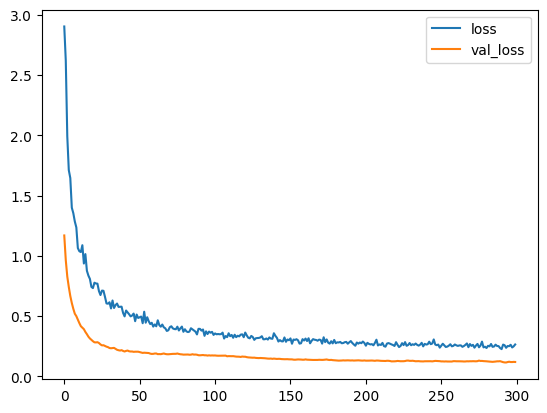

In [81]:
# Plot the Losses
losses_smote_drop.plot( )

**Checking ANN Classification with Drop Out Model Accuracy**

In [82]:
# Accuracy on Training SMOTE Data
X_train_smote_drop_prediction = (model_smote_drop.predict(X_train) > 0.5).astype("int32")
training_smote_data_accuracy = accuracy_score(X_train_smote_drop_prediction, Y_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [83]:
print('Accuracy on Training SMOTE-Drop Out Data : ', training_smote_data_accuracy)

Accuracy on Training SMOTE-Drop Out Data :  0.8685714285714285


In [84]:
# Accuracy on Validation SMOTE Data
X_valid_smote_drop_prediction = (model_smote_drop.predict(X_valid) > 0.5).astype("int32")
validation_smote_data_accurac = accuracy_score(X_valid_smote_drop_prediction, Y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [85]:
print('Accuracy on Validation SMOTE Drop Out Data : ', validation_smote_data_accurac)

Accuracy on Validation SMOTE Drop Out Data :  0.82


In [86]:
# Get Prediction for Validation Data
Y_pred_smote_drop = (model_smote_drop.predict(X_valid) > 0.5).astype("int32")
#Y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


**Confusion Matrix - Balanced Data-SMOTE Drop Out Method**

In [87]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , Y_pred_smote_drop))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87        52
           1       0.76      0.99      0.86        83
           2       0.00      0.00      0.00        15

    accuracy                           0.82       150
   macro avg       0.58      0.59      0.58       150
weighted avg       0.76      0.82      0.78       150



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matix - Balancing-SMOTE Drop Out Method')

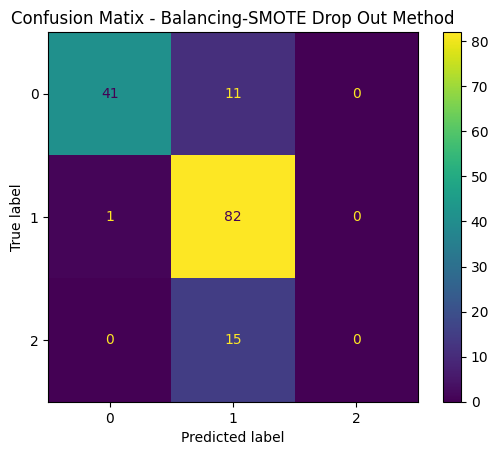

In [88]:
# Create a Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_valid, Y_pred_smote_drop)
plt.title("Confusion Matix - Balancing-SMOTE Drop Out Method")